<a href="https://colab.research.google.com/github/grandfatherr/Mchezopesa-Ltd-football-modelling/blob/main/Edwin_Mutuma_Core_Module_2_Week_6_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Football Prediction

##1.0 Defining the question

###a) Specifying the question

Having been recruited as a football analyst by Mchezopesa Ltd, I was tasked with accomplishing the task outlined below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

###b) Defining the metric for success

This project will be successful when we accurately predict the winning team based on the Home team or away team and the type of tournament.

###c) Understanding the context
Mchezopesa Ltd wishes to implement a model that can effectively predict the results of two teams for purposes of managing the amount of money that they will attach to bets from their customers.

Being a betting company, Mchezopesa Ltd will greatly benefit from the ability to predict football results since they will be able to come up with odds of football games that they offer on the betting platform for maximum gain.

###d) Recording the experimental design



*   Reading the datasets into our notebook



*   Perform EDA

*   Check multicollinearity
*   Build polynomial regression model


*   Cross-validate The Polyniamial Regression Model


*   Perform any necessary Feature Engineering

*   Build a Logistic Regression Model
*   Perform hyperparameter tuning for the Logistic Regression Model.







###e) Data relevance

The data provided is relevant to our research as it includes information on performance of various teams. It could be used to predict the performance of our model

##1.1 Reading the data

In [1]:
# Import the necessary libraries to work with in our project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
rank = pd.read_csv('/content/fifa_ranking.csv')

In [3]:
# loading the dataset
results = pd.read_csv('/content/results.csv')

##1.3 Checking the data

In [4]:
# looking at the top of the dataset (fifa rank)
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [5]:
# looking at the top of the dataset (results)
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [6]:
# looking at the bottom of the datsset (fifa rank)
rank.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [7]:
# looking at the bottom of the datsset (results)
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [8]:
# Checking the size of the datasets
print(rank.shape)
print(results.shape)

(57793, 16)
(40839, 9)


In [9]:
# Checking whether each column has an appropriate datatype (Fifa rankings)
rank.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [10]:
# Checking whether each column has an appropriate datatype (Results)
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

##1.4 External data source Validation

Here we check to ensure that our data is correct and is a representation of the actual situation in the real world. 

Generated a random sample to be used for validation as shown below. The validation was made using a website that contains details of the match played between Slovakia and Latvia from 9th October 2004, and can be obtained [here](https://ng.soccerway.com/matches/2004/10/09/europe/wc-qualifying-europe/slovakia/latvia/238701/).

In [11]:
results.sample(1)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
34430,2012-09-11,Tahiti,New Caledonia,0,4,FIFA World Cup qualification,Pirae,French Polynesia,True


##1.5 Cleaning the dataset

###1.5.1 Completeness

In [12]:
# Checking whether we have completeness in our data
rank.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [13]:
# Checking whether we have completeness in our data (results)
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

###1.5.2 Consistency

In [14]:
# Checking whether we have consistency in our data (Ranking)
rank.duplicated().sum()

37

In [15]:
# Checking whether we have consistency in our data (Results)
results.duplicated().sum()

0

In [16]:
# lets look at the duplicated values in our ranking dataset
rank[rank.duplicated()]

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
41320,113,Sudan,SDN,297.13,304,-1,126.55,126.55,219.72,109.86,67.36,20.21,202.53,40.51,CAF,2011-12-21
41536,120,Sudan,SDN,264.81,297,-7,129.14,129.14,163.12,81.56,40.91,12.27,209.21,41.84,CAF,2012-01-18
41736,111,Sudan,SDN,301.67,265,9,156.34,156.34,163.12,81.56,40.91,12.27,257.48,51.50,CAF,2012-02-15
41944,110,Sudan,SDN,299.75,302,1,156.34,156.34,163.12,81.56,46.75,14.03,239.09,47.82,CAF,2012-03-07
42157,113,Sudan,SDN,292.03,300,-3,149.12,149.12,180.83,90.42,0.00,0.00,262.47,52.49,CAF,2012-04-11
42366,113,Sudan,SDN,292.03,292,0,149.12,149.12,180.83,90.42,0.00,0.00,262.47,52.49,CAF,2012-05-09
42562,101,Sudan,SDN,338.25,292,12,179.70,179.70,209.32,104.66,7.08,2.12,258.83,51.77,CAF,2012-06-06
42775,105,Sudan,SDN,329.36,338,-4,171.57,171.57,229.19,114.60,8.50,2.55,203.22,40.64,CAF,2012-07-04
42983,104,Sudan,SDN,329.36,329,1,171.57,171.57,229.19,114.60,8.50,2.55,203.22,40.64,CAF,2012-08-08
43193,103,Sudan,SDN,331.79,329,1,169.05,169.05,187.77,93.88,108.13,32.44,182.11,36.42,CAF,2012-09-05


###1.5.3 Uniformity

In [17]:
# Converting object type date to datetime 
rank.rank_date = pd.to_datetime(rank.rank_date)
results.date = pd.to_datetime(results.date)

In [18]:
# Check the various years we have in our data (results data)
results.date.dt.year.unique()

array([1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

In [19]:
# Check the various years we have in our data (rank dataset)
rank.rank_date.dt.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

###1.5.4 Validity

In [20]:
rank = rank.drop(columns=['country_abrv', 'total_points', 'rank_change','cur_year_avg',
                   'cur_year_avg_weighted', 'previous_points', 'last_year_avg',	'last_year_avg_weighted', 'two_year_ago_avg',
                   'two_year_ago_weighted',	'three_year_ago_avg',	'three_year_ago_weighted',
                   'confederation'])

In [21]:
# Remove the day from the date time
results['date'] = results['date'].dt.strftime('%Y-%m')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03,England,Scotland,4,2,Friendly,London,England,False
2,1874-03,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03,England,Scotland,2,2,Friendly,London,England,False
4,1876-03,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [22]:
# Remove the day from the date time
rank['rank_date'] = rank['rank_date'].dt.strftime('%Y-%m')
rank.head()

,rank,country_full,rank_date
0,1,Germany,1993-08
1,2,Italy,1993-08
2,3,Switzerland,1993-08
3,4,Sweden,1993-08
4,5,Argentina,1993-08


In [23]:
# Get ranking data for home team
home = pd.merge(results, rank, how = 'inner', left_on=['date', 'home_team'], right_on=['rank_date', 'country_full'])
home 

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,rank_date
0,1993-08,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,19,Colombia,1993-08
1,1993-08,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,19,Colombia,1993-08
2,1993-08,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,False,19,Colombia,1993-08
3,1993-08,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,70,Peru,1993-08
4,1993-08,Peru,Colombia,0,1,FIFA World Cup qualification,Lima,Peru,False,70,Peru,1993-08
...,...,...,...,...,...,...,...,...,...,...,...,...
18604,2018-06,Nigeria,Iceland,2,0,FIFA World Cup,Volgograd,Russia,True,48,Nigeria,2018-06
18605,2018-06,Nigeria,Argentina,1,2,FIFA World Cup,St. Petersburg,Russia,True,48,Nigeria,2018-06
18606,2018-06,Australia,Peru,0,2,FIFA World Cup,Sochi,Russia,True,36,Australia,2018-06
18607,2018-06,Senegal,Colombia,0,1,FIFA World Cup,Samara,Russia,True,27,Senegal,2018-06


In [24]:
# Get ranking data for away team 
away = pd.merge(results, rank, how = 'inner', left_on=['date', 'away_team'], right_on=['rank_date', 'country_full'])
away

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,rank_date
0,1993-08,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,67,Paraguay,1993-08
1,1993-08,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,67,Paraguay,1993-08
2,1993-08,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,5,Argentina,1993-08
3,1993-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,5,Argentina,1993-08
4,1993-08,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,5,Argentina,1993-08
...,...,...,...,...,...,...,...,...,...,...,...,...
18521,2018-06,Denmark,France,0,0,FIFA World Cup,Moscow,Russia,True,7,France,2018-06
18522,2018-06,Nigeria,Argentina,1,2,FIFA World Cup,St. Petersburg,Russia,True,5,Argentina,2018-06
18523,2018-06,France,Argentina,4,3,FIFA World Cup,Kazan,Russia,True,5,Argentina,2018-06
18524,2018-06,Japan,Poland,0,1,FIFA World Cup,Volgograd,Russia,True,8,Poland,2018-06


In [25]:
fifa = pd.merge(home, away, how='inner', left_on=['date', 'away_team', 'home_score', 'away_score', 
                                                  'home_team', 'tournament', 'country'], right_on=['date', 'away_team', 
                                                  'home_score', 'away_score', 'home_team', 'tournament', 'country'])

In [26]:
fifa

,date,home_team,away_team,home_score,away_score,tournament,city_x,country,neutral_x,rank_x,country_full_x,rank_date_x,city_y,neutral_y,rank_y,country_full_y,rank_date_y
0,1993-08,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,19,Colombia,1993-08,Barranquilla,False,67,Paraguay,1993-08
1,1993-08,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,19,Colombia,1993-08,Barranquilla,False,5,Argentina,1993-08
2,1993-08,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,False,19,Colombia,1993-08,Barranquilla,False,70,Peru,1993-08
3,1993-08,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,70,Peru,1993-08,Lima,False,5,Argentina,1993-08
4,1993-08,Peru,Colombia,0,1,FIFA World Cup qualification,Lima,Peru,False,70,Peru,1993-08,Lima,False,19,Colombia,1993-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17024,2018-06,Nigeria,Iceland,2,0,FIFA World Cup,Volgograd,Russia,True,48,Nigeria,2018-06,Volgograd,True,22,Iceland,2018-06
17025,2018-06,Nigeria,Argentina,1,2,FIFA World Cup,St. Petersburg,Russia,True,48,Nigeria,2018-06,St. Petersburg,True,5,Argentina,2018-06
17026,2018-06,Australia,Peru,0,2,FIFA World Cup,Sochi,Russia,True,36,Australia,2018-06,Sochi,True,11,Peru,2018-06
17027,2018-06,Senegal,Colombia,0,1,FIFA World Cup,Samara,Russia,True,27,Senegal,2018-06,Samara,True,16,Colombia,2018-06


In [27]:
# Dropping the columns that we won't be needing
fifa  = fifa.drop(columns=['city_x', 'city_y', 'country', 'neutral_x', 'neutral_y', 'rank_date_x', 'rank_date_y', 'country_full_x', 'country_full_y'])
fifa 

,date,home_team,away_team,home_score,away_score,tournament,rank_x,rank_y
0,1993-08,Colombia,Paraguay,0,0,FIFA World Cup qualification,19,67
1,1993-08,Colombia,Argentina,2,1,FIFA World Cup qualification,19,5
2,1993-08,Colombia,Peru,4,0,FIFA World Cup qualification,19,70
3,1993-08,Peru,Argentina,0,1,FIFA World Cup qualification,70,5
4,1993-08,Peru,Colombia,0,1,FIFA World Cup qualification,70,19
...,...,...,...,...,...,...,...,...
17024,2018-06,Nigeria,Iceland,2,0,FIFA World Cup,48,22
17025,2018-06,Nigeria,Argentina,1,2,FIFA World Cup,48,5
17026,2018-06,Australia,Peru,0,2,FIFA World Cup,36,11
17027,2018-06,Senegal,Colombia,0,1,FIFA World Cup,27,16


In [28]:
fifa.rename(columns={'rank_x' : 'home_team_rank', 'rank_y' : 'away_team_rank'}, inplace=True)
fifa 

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank
0,1993-08,Colombia,Paraguay,0,0,FIFA World Cup qualification,19,67
1,1993-08,Colombia,Argentina,2,1,FIFA World Cup qualification,19,5
2,1993-08,Colombia,Peru,4,0,FIFA World Cup qualification,19,70
3,1993-08,Peru,Argentina,0,1,FIFA World Cup qualification,70,5
4,1993-08,Peru,Colombia,0,1,FIFA World Cup qualification,70,19
...,...,...,...,...,...,...,...,...
17024,2018-06,Nigeria,Iceland,2,0,FIFA World Cup,48,22
17025,2018-06,Nigeria,Argentina,1,2,FIFA World Cup,48,5
17026,2018-06,Australia,Peru,0,2,FIFA World Cup,36,11
17027,2018-06,Senegal,Colombia,0,1,FIFA World Cup,27,16


In [29]:
#creating a new column of status of match based on home team
status = []
#x = ['Win', 'Loss', 'Draw']
for i in range(len(fifa)):
    if fifa.home_score.iloc[i] > fifa.away_score.iloc[i]:
      status.append('Win')
    elif fifa.home_score.iloc[i] < fifa.away_score.iloc[i]:
      status.append('Loss')
    else:
      status.append('Draw')
status = pd.DataFrame(status, columns= ['status'])
fifa = pd.concat([fifa,status],axis=1)
fifa

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,status
0,1993-08,Colombia,Paraguay,0,0,FIFA World Cup qualification,19,67,Draw
1,1993-08,Colombia,Argentina,2,1,FIFA World Cup qualification,19,5,Win
2,1993-08,Colombia,Peru,4,0,FIFA World Cup qualification,19,70,Win
3,1993-08,Peru,Argentina,0,1,FIFA World Cup qualification,70,5,Loss
4,1993-08,Peru,Colombia,0,1,FIFA World Cup qualification,70,19,Loss
...,...,...,...,...,...,...,...,...,...
17024,2018-06,Nigeria,Iceland,2,0,FIFA World Cup,48,22,Win
17025,2018-06,Nigeria,Argentina,1,2,FIFA World Cup,48,5,Loss
17026,2018-06,Australia,Peru,0,2,FIFA World Cup,36,11,Loss
17027,2018-06,Senegal,Colombia,0,1,FIFA World Cup,27,16,Loss


###1.5.5 Checking for outliers

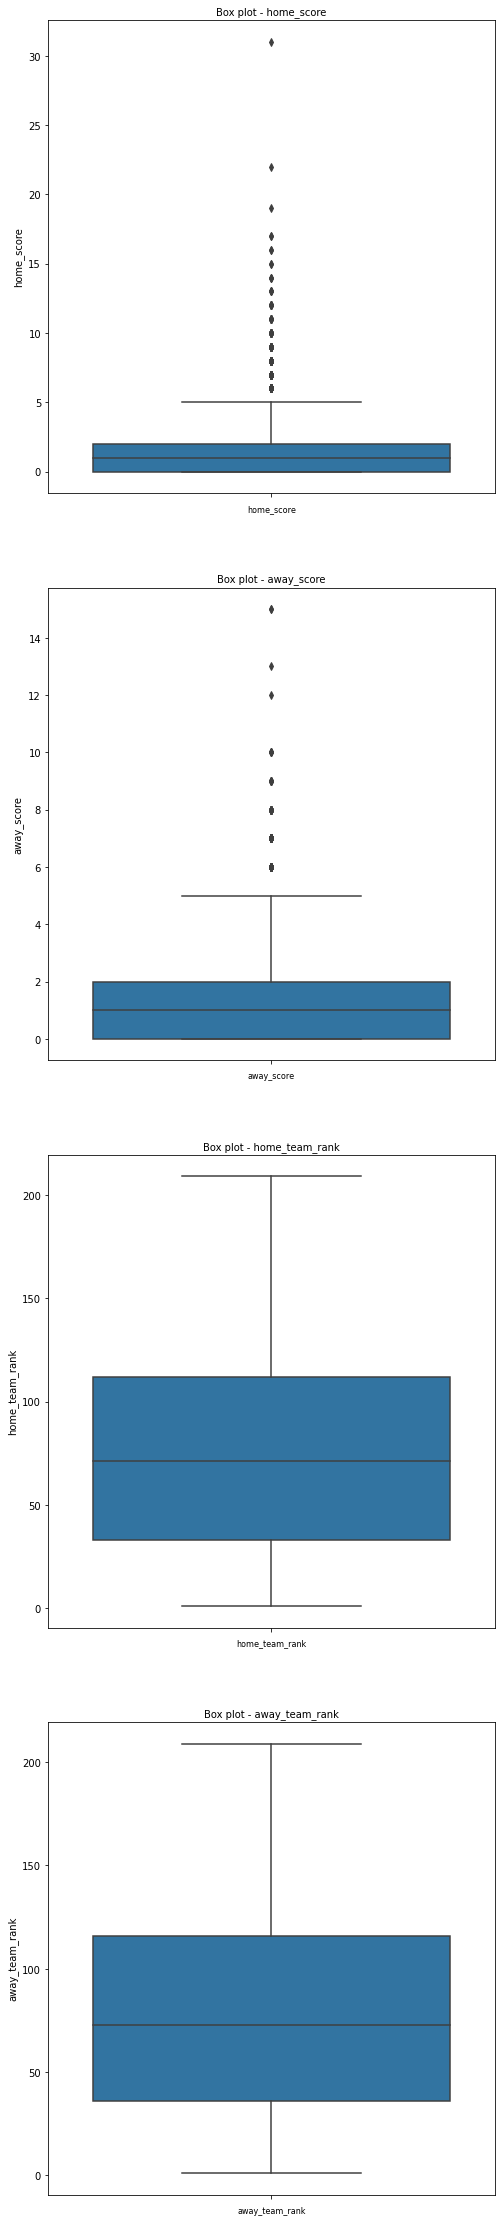

In [30]:
col_names = ['home_score','away_score', 'home_team_rank', 'away_team_rank']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = fifa[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

##1.6 Exploratory Data Analysis

###1.6.1 Univariate summaries

####1.6.1 a) Univariate plots

In [31]:
# Check the data types of the merged dataset
fifa.dtypes 

date              object
home_team         object
away_team         object
home_score         int64
away_score         int64
tournament        object
home_team_rank     int64
away_team_rank     int64
status            object
dtype: object

In [32]:
#checking value counts of same
fifa.tournament.value_counts().head(10)

Friendly                                6503
FIFA World Cup qualification            3971
UEFA Euro qualification                 1383
African Cup of Nations qualification     878
AFC Asian Cup qualification              389
CECAFA Cup                               325
African Cup of Nations                   281
Copa América                             225
COSAFA Cup                               222
African Nations Championship             187
Name: tournament, dtype: int64

In [33]:
# Converting object type date to datetime 
fifa.date = pd.to_datetime(fifa.date)

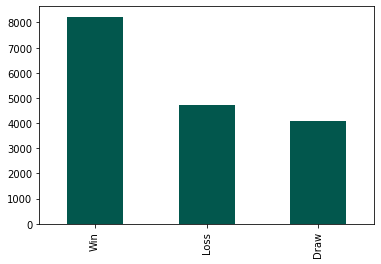

In [34]:
fifa['status'].value_counts().plot(kind='bar',color='#02574d')

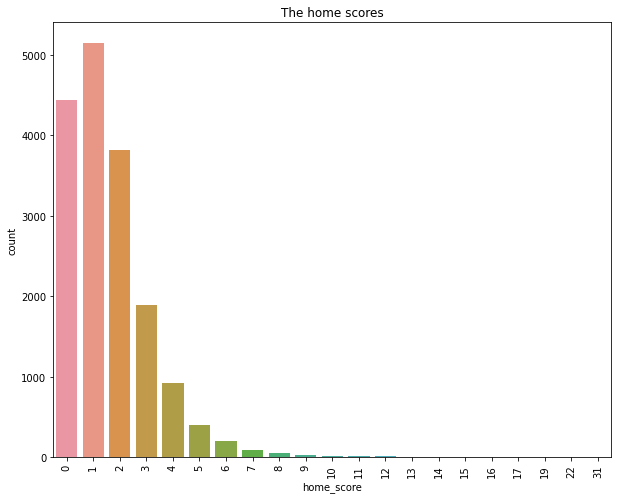

In [35]:
#Count plots
plt.figure(figsize = [10,8])
sns.countplot(x =fifa.home_score, data=fifa)
plt.title('The home scores')
plt.xticks(rotation = 90)
plt.show()

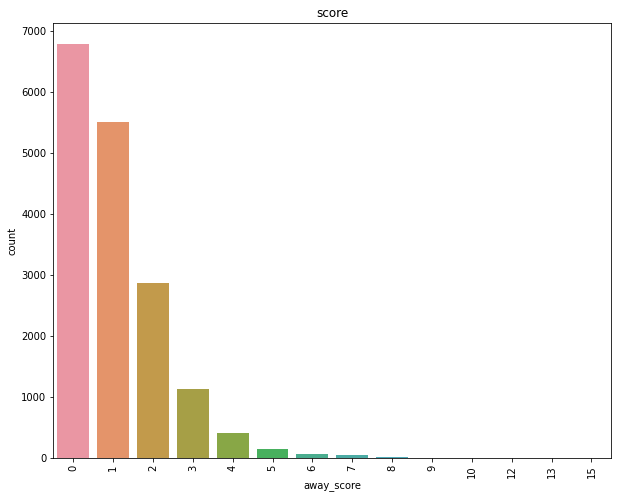

In [36]:
#Count plots
plt.figure(figsize = [10,8])
sns.countplot(x =fifa.away_score, data=fifa)
plt.title('score')
plt.xticks(rotation = 90)
plt.show()

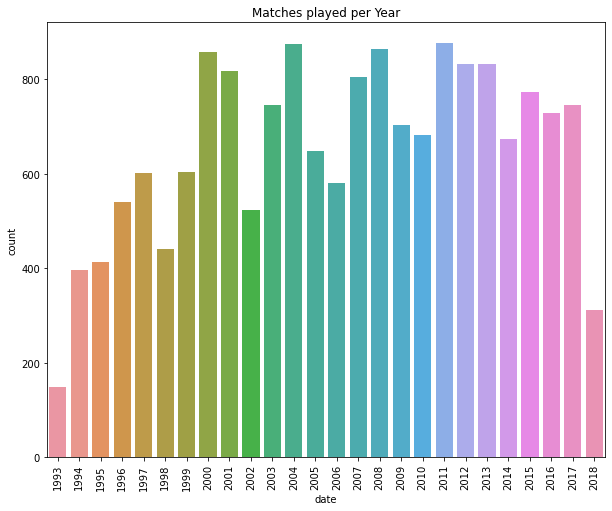

In [37]:
#Count plots
plt.figure(figsize = [10,8])
sns.countplot(x =fifa.date.dt.year, data=fifa)
plt.title('Matches played per Year')
plt.xticks(rotation = 90)
plt.show()

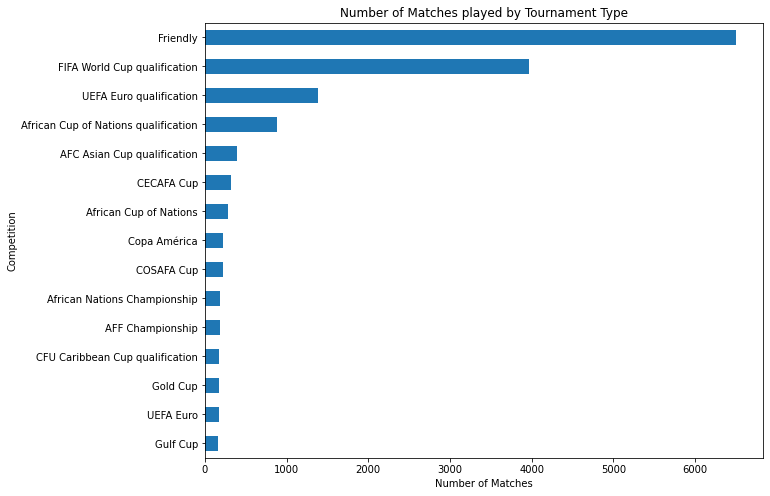

In [38]:
#Tournaments Top 10
plt.figure(figsize = [10,8])
top_10 = fifa['tournament'].value_counts().sort_values(ascending=False).head(15)
top_10.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of Matches')
plt.ylabel('Competition')
plt.title('Number of Matches played by Tournament Type')
plt.show()

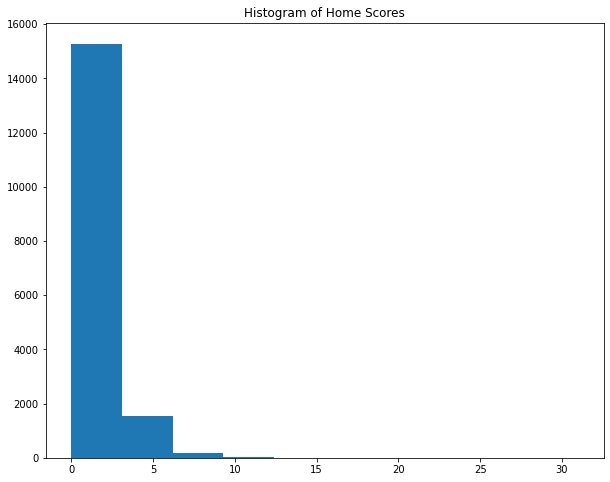

In [39]:
#Histogram of home scores
plt.figure(figsize = [10,8])
plt.hist(fifa['home_score'])
plt.title('Histogram of Home Scores')
plt.show()

The home scores is not normally distributed but exhibits distribution that is positively skewed

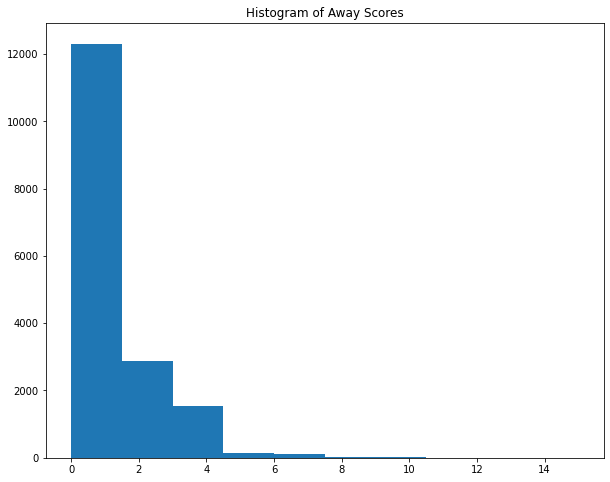

In [40]:
#Histogram of away scores
plt.figure(figsize = [10,8])
plt.hist(fifa['away_score'])
plt.title('Histogram of Away Scores')
plt.show()

In [41]:
# Ploting the univariate summaries and recording our observations
fifa.describe()

,home_score,away_score,home_team_rank,away_team_rank
count,17029.000000,17029.000000,17029.000000,17029.000000
mean,1.601738,1.065888,76.144459,79.079042
std,1.613948,1.243165,50.797089,52.060395
min,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,33.000000,36.000000
50%,1.000000,1.000000,71.000000,73.000000
75%,2.000000,2.000000,112.000000,116.000000
max,31.000000,15.000000,209.000000,209.000000


####1.6.1 b) Measures of central tendency and dispersion

In [42]:
# mean of the home team score 
fifa['home_score'].mean()

1.6017382112866287

In [43]:
# mean of the away team score 
fifa['away_score'].mean()

1.0658876034999119

In [44]:
# mode of the home team score 
fifa['home_score'].mode()

0    1
dtype: int64

In [45]:
# mode of the away team score 
fifa['away_score'].mode()

0    0
dtype: int64

In [46]:
# mode of the ranks 
fifa['home_team_rank'].mode()

0    5
dtype: int64

In [47]:
fifa['away_team_rank'].mode()

0    1
dtype: int64

In [48]:
# median of the home team score 
fifa['home_score'].median()

1.0

In [49]:
# median of the home team score 
fifa['away_score'].median()

1.0

###1.6.2 Bivariate Summaries

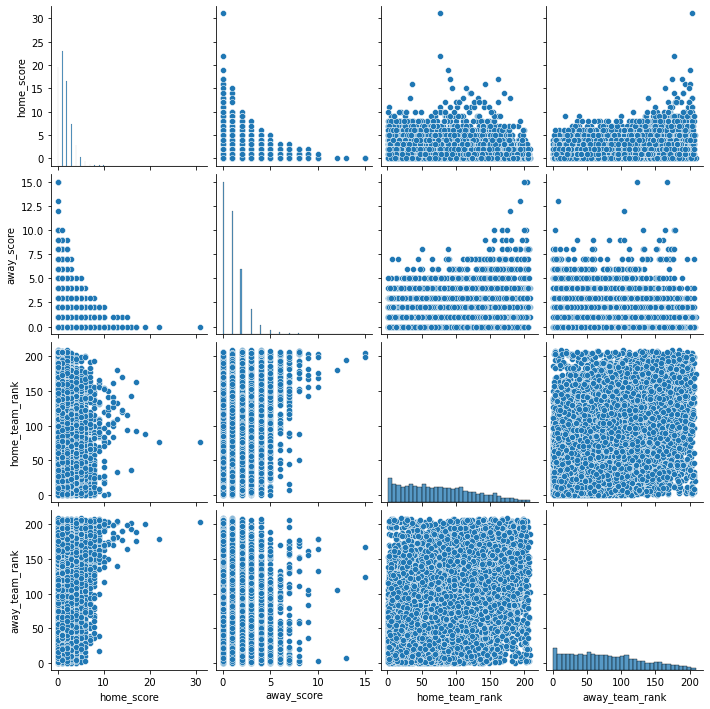

In [50]:
# bivariate summaries
sns.pairplot(fifa)

In [51]:
# Correlations
fifa.corr()

,home_score,away_score,home_team_rank,away_team_rank
home_score,1.000000,-0.162949,-0.136300,0.317931
away_score,-0.162949,1.000000,0.220778,-0.181048
home_team_rank,-0.136300,0.220778,1.000000,0.469472
away_team_rank,0.317931,-0.181048,0.469472,1.000000


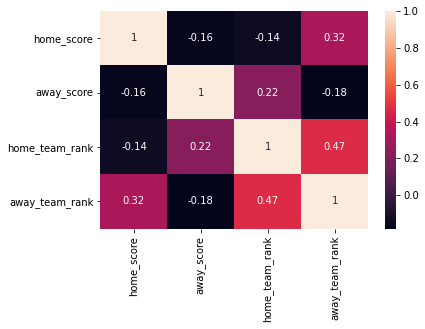

In [52]:
# correlation heatmap
sns.heatmap(fifa.corr(), annot=True)

##1.7 Polynomial Regression

###1.7.1 Model 1: predicting how many goals the home team scores

In [53]:
# Correlations
fifa.corr()

,home_score,away_score,home_team_rank,away_team_rank
home_score,1.000000,-0.162949,-0.136300,0.317931
away_score,-0.162949,1.000000,0.220778,-0.181048
home_team_rank,-0.136300,0.220778,1.000000,0.469472
away_team_rank,0.317931,-0.181048,0.469472,1.000000


In [54]:
# check the dataset
fifa.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,status
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,19,67,Draw
1,1993-08-01,Colombia,Argentina,2,1,FIFA World Cup qualification,19,5,Win
2,1993-08-01,Colombia,Peru,4,0,FIFA World Cup qualification,19,70,Win
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,70,5,Loss
4,1993-08-01,Peru,Colombia,0,1,FIFA World Cup qualification,70,19,Loss


In [55]:
#have tournament type as only World Cup, Friendly and Other
fifa.tournament = fifa.tournament.apply(lambda x: 'World Cup' if x == 'FIFA World Cup qualification' 
                                            else ( 'World Cup' if x == 'FIFA World Cup' else ('Friendly' if x == 'Friendly' else 'Other')))

In [56]:
# Previewing our dataset
fifa.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,status
0,1993-08-01,Colombia,Paraguay,0,0,World Cup,19,67,Draw
1,1993-08-01,Colombia,Argentina,2,1,World Cup,19,5,Win
2,1993-08-01,Colombia,Peru,4,0,World Cup,19,70,Win
3,1993-08-01,Peru,Argentina,0,1,World Cup,70,5,Loss
4,1993-08-01,Peru,Colombia,0,1,World Cup,70,19,Loss


In [57]:
# label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# apply le on categorical feature columns
fifa['tournament'] = le.fit_transform(fifa['tournament'])

In [58]:
#encoding status column whilst maintaining order
fifa['status'] = fifa['status'].replace(['Win','Draw','Loss'],[2, 1, 0]) 

In [59]:
# previewing the top of our data
fifa.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,status
0,1993-08-01,Colombia,Paraguay,0,0,2,19,67,1
1,1993-08-01,Colombia,Argentina,2,1,2,19,5,2
2,1993-08-01,Colombia,Peru,4,0,2,19,70,2
3,1993-08-01,Peru,Argentina,0,1,2,70,5,0
4,1993-08-01,Peru,Colombia,0,1,2,70,19,0


In [60]:
# Defining our variables
X = fifa.iloc[:, 5:8]
y = fifa.home_score.values

X.head()

,tournament,home_team_rank,away_team_rank
0,2,19,67
1,2,19,5
2,2,19,70
3,2,70,5
4,2,70,19


In [61]:
# correlations of our independent variables
correlations = X.corr()
correlations 

,tournament,home_team_rank,away_team_rank
tournament,1.000000,0.032186,0.025039
home_team_rank,0.032186,1.000000,0.469472
away_team_rank,0.025039,0.469472,1.000000


The features chosen from the dataset to be used in our model have an acceptable range of multicollinearity so there's no need to drop any features

In [62]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [63]:
# splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.35, random_state = 42)

In [64]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

In [65]:
# let's check with 3 degrees of freedom

poly_reg_3 = PolynomialFeatures(degree = 3) 
X_poly_3 = poly_reg_3.fit_transform(X)

pol_3_reg = LinearRegression()
pol_3_reg.fit(X_poly_3, y)

y_pred_3 = pol_3_reg.predict(poly_reg_3.fit_transform(X_test))

In [66]:
from sklearn import metrics

print('RMSE 2:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE 3:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_3)))

RMSE 2: 1.4120171647683857
RMSE 3: 1.4046794919914065


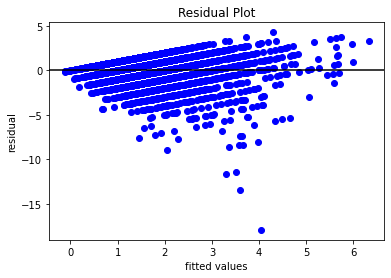

In [67]:
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='blue')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black')
plt.show()

In [68]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


#### Cross-validating the model

In [69]:
from sklearn.model_selection import KFold

# We will use the same 4 independent variables for this
X = fifa[['home_team_rank', 'away_team_rank', 'tournament']].values
y = fifa.home_score.values

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
    print('\nTraining model ' + str(count))
  
    # set up the train and test based on the split determined by KFold
    # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
  
    # fit a model accordingly
    regressor = LinearRegression()  
    regressor.fit(X_train, y_train)
  
    # assess the accuraccy of the model
    y_pred = regressor.predict(X_test)
  
    rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    RMSES.append(rmse_value)
  
    print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
    count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.4851366951945282

Training model 2
Model 2 Root Mean Squared Error: 1.604814905639865

Training model 3
Model 3 Root Mean Squared Error: 1.3612413853261556

Training model 4
Model 4 Root Mean Squared Error: 1.3644799092358009

Training model 5
Model 5 Root Mean Squared Error: 1.3554571929446149


In [70]:
np.mean(RMSES)

1.434226017668193

As you can see, the average is somewhat close to our initial value. In our case, however, it might be worthwile to pick model 5 instead as it has the lowest RMSE. That said, our RMSEs are somewhat varied from each other.

###1.7.2 Model 2: predicting based on goals away team scored

In [71]:
# Previewing our dataset
fifa.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,status
0,1993-08-01,Colombia,Paraguay,0,0,2,19,67,1
1,1993-08-01,Colombia,Argentina,2,1,2,19,5,2
2,1993-08-01,Colombia,Peru,4,0,2,19,70,2
3,1993-08-01,Peru,Argentina,0,1,2,70,5,0
4,1993-08-01,Peru,Colombia,0,1,2,70,19,0


In [72]:
X = fifa.iloc[:, 5:8]
y = fifa['away_score'].values

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [73]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

In [74]:
# Use 3 degrees
poly_reg_3 = PolynomialFeatures(degree = 3) 
X_poly_3 = poly_reg_3.fit_transform(X)

pol_3_reg = LinearRegression()
pol_3_reg.fit(X_poly_3, y)

y_pred_3 = pol_3_reg.predict(poly_reg_3.fit_transform(X_test))

In [75]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_3)))

Root Mean Squared Error: 1.142027127147297
Root Mean Squared Error: 1.1325097709989815


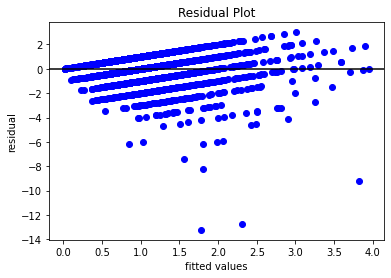

In [76]:
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='blue')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black')
plt.show()

In [77]:
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


#### Cross validation model 2

In [78]:
from sklearn.model_selection import KFold

# We will use the same 4 independent variables for this
X = fifa[['home_team_rank', 'away_team_rank', 'tournament']].values
y = fifa.away_score.values

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
    print('\nTraining model ' + str(count))
  
    # set up the train and test based on the split determined by KFold
    # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
  
    # fit a model accordingly
    regressor = LinearRegression()  
    regressor.fit(X_train, y_train)
  
    # assess the accuraccy of the model
    y_pred = regressor.predict(X_test)
  
    rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    RMSES.append(rmse_value)
  
    print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
    count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.1492636474489017

Training model 2
Model 2 Root Mean Squared Error: 1.172667853246252

Training model 3
Model 3 Root Mean Squared Error: 1.1805152449848821

Training model 4
Model 4 Root Mean Squared Error: 1.1192137762090215

Training model 5
Model 5 Root Mean Squared Error: 1.0983073832282815


In [79]:
np.mean(RMSES)

1.1439935810234678

In our case of model 2, it might be worthwile to pick model 5 over all the others as it has the lowest RMSE.

##1.8 Logistic Regression

In [80]:
X =fifa.drop(columns= ['date', 'home_team',	'away_team', 'tournament', 'status'])
y = fifa.status

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state=42)

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)

# Evaluating the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[1601,    0,    0],
       [   0, 1501,    0],
       [   0,    0, 2859]])

In [81]:
fifa.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,status
0,1993-08-01,Colombia,Paraguay,0,0,2,19,67,1
1,1993-08-01,Colombia,Argentina,2,1,2,19,5,2
2,1993-08-01,Colombia,Peru,4,0,2,19,70,2
3,1993-08-01,Peru,Argentina,0,1,2,70,5,0
4,1993-08-01,Peru,Colombia,0,1,2,70,19,0


In [82]:
# defining the variables
X = fifa.drop(columns= ['date', 'home_team',	'away_team', 'tournament', 'status'])
y = fifa.iloc[:, 8]

In [83]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [84]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [85]:
# training the model

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
# Making the predictions

y_pred = LogReg.predict(X_test)

In [87]:
# Evaluating the model

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 931,    0,    0],
       [   0,  843,    0],
       [   0,    0, 1632]])

#### Hyperparameter tuning

In [88]:
# Alternative Solution

# scaling data as advised by the warning after running the previous cell.
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train = scaler.transform(X_train)

# Creating the logistic regression to improve the regression as suggested by the warning
# after running the previous cell.

logistic = linear_model.LogisticRegression()

In [89]:
# Creating regularization penalty space
penalty = ['l1', 'l2']

# Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)

solver = [ 'liblinear', 'sag', 'saga']

max_iter=(50,100)
#np.arange(30,151,20)

# Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty,  max_iter = max_iter, solver = solver)

In [90]:
# Creating grid search using 5-fold cross validation
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(LogReg, hyperparameters, cv=5, verbose=0)

In [91]:
# Fitting grid search
best_model = clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/

In [92]:
#Showing the best model score
print(best_model.best_score_)

1.0


In [93]:
#showing the best model Hyperparameters we can use to improve the model
print(best_model.best_params_)

{'C': 1.0, 'max_iter': 50, 'penalty': 'l1', 'solver': 'saga'}


## Recommendations

Based on the analysis, some actionable insights to be given to Mchezopesa would be:

*   Their betting platform should offer lower odds on teams that are playing while home since on average, they tend to score more goals on average as compared to teams playing away from home.
*   Mchezopesa should focus more on friendlies and offer these games for betting as they tend to be the most matches played.
*   Mchezopesa should give fewer odds for goals scored between 0 and 5 as they tend to be most achiueved in different games and have higher odds for goals beyond 5 as they tend to be less scored.







## Follow up questions

### a). Did we have the right data?
Yes. The data we had was right and was useful in our project.

### b). Do we need other data to answer our question?

Yes definitely. The data we had was quite right but we could have used more data maybe on the player ratings and rankings as well as more metrics for the players that would help in prediction.

### c). Did we have the right question?

Yes we had the right question. Prediction on football is an interesting concept that could be leveraged to create and tailor the odds to give to each team.